In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import unidecode
import re
from nltk.corpus import stopwords
from sentence_transformers import SimilarityFunction
from sentence_transformers import SentenceTransformer

C:\Users\lilou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load cosine comparison scores
df_cosinus = pd.read_csv("FID gpt models/huit_modele_comparaison_cosinus_score.csv", sep=";")

# Load GPT prompt results for k=5
df_gpt_prompt2_k5 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_2 (k=5).csv", sep=";") 
df_gpt_prompt3_k5 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_3 (k=5).csv", sep=";") 
df_gpt_prompt5_k5 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_5 (k=5).csv", sep=";")
df_gpt_prompt6_k5 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_6 (k=5).csv", sep=";")

# Load GPT prompt results for k=10
df_gpt_prompt2_k10 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_2 (k=10).csv", sep=";") 
df_gpt_prompt3_k10 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_3 (k=10).csv", sep=";") 
df_gpt_prompt5_k10 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_5 (k=10).csv", sep=";")
df_gpt_prompt6_k10 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_6 (k=10).csv", sep=";")

# Load GPT prompt results for k=20
df_gpt_prompt2_k20 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_2 (k=20).csv", sep=";") 
df_gpt_prompt3_k20 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_3 (k=20).csv", sep=";") 
df_gpt_prompt5_k20 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_5 (k=20).csv", sep=";") 
df_gpt_prompt6_k20 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_6 (k=20).csv", sep=";") 
df_gpt_prompt15_k20 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_15 (k=20).csv", sep=";") 
df_gpt_promptra_k20 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_3 (k=20) - right_answer_first.csv", sep=";")

# Load GPT prompt results for k=30
df_gpt_prompt2_k30 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_2 (k=30).csv", sep=";") 
df_gpt_prompt3_k30 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_3 (k=30).csv", sep=";") 
df_gpt_prompt5_k30 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_5 (k=30).csv", sep=";") 
df_gpt_prompt6_k30 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_6 (k=30).csv", sep=";") 

# Load GPT prompt results for k=40
df_gpt_prompt2_k40 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_2 (k=40).csv", sep=";") 
df_gpt_prompt3_k40 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_3 (k=40).csv", sep=";") 
df_gpt_prompt5_k40 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_5 (k=40).csv", sep=";") 
df_gpt_prompt6_k40 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_6 (k=40).csv", sep=";") 

# Load GPT prompt results for k=50
df_gpt_prompt2_k50 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_2 (k=50).csv", sep=";") 
df_gpt_prompt3_k50 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_3 (k=50).csv", sep=";") 
df_gpt_prompt5_k50 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_5 (k=50).csv", sep=";") 
df_gpt_prompt6_k50 = pd.read_csv("FID gpt models/miniLM + chat_gpt_prompt_6 (k=50).csv", sep=";") 

# Load cleaned OSM and Foursquare datasets
df_osm = pd.read_csv('C:/Users/lilou/Documents/STAGE-TRENTO/Database/Clean_categories/categories_OSM_clean.csv', sep=';')
df_fs = pd.read_csv('C:/Users/lilou/Documents/STAGE-TRENTO/Database/Clean_categories/categories_FS_clean.csv', sep=';')
df_fs_desc = pd.read_csv('C:/Users/lilou/Documents/STAGE-TRENTO/Database/Clean_categories/categories_FS_clean_description.csv', sep=';')
df_oracle = pd.read_csv('df_oracle.csv', sep=";")

# Dictionary mapping model IDs to model names or GPT + prompt configurations
model_names = {
    "mod_1": 'paraphrase-MiniLM-L6-v2',
    "mod_2": 'all-MiniLM-L6-v2',
    "mod_3": 'all-distilroberta-v1',
    "mod_4": 'all-mpnet-base-v2',
    "mod_5": 'paraphrase-mpnet-base-v2',
    "mod_6": 'paraphrase-distilroberta-base-v2',
    "mod_7": 'paraphrase-TinyBERT-L6-v2',
    "mod_8": 'all-MiniLM-L12-v2',
    
    # miniLM + prompts with modified order
    "mod_9": "miniLM + prompt_2 (k=5)",
    "mod_10": "miniLM + prompt_3 (k=5)",
    "mod_11": "miniLM + prompt_5 (k=5)",
    "mod_12": "miniLM + prompt_6 (k=5)",

    "mod_13": "miniLM + prompt_2 (k=10)",
    "mod_14": "miniLM + prompt_3 (k=10)",
    "mod_15": "miniLM + prompt_5 (k=10)",
    "mod_16": "miniLM + prompt_6 (k=10)",

    "mod_17": "miniLM + prompt_2 (k=20)",
    "mod_18": "miniLM + prompt_3 (k=20)",
    "mod_19": "miniLM + prompt_5 (k=20)",
    "mod_20": "miniLM + prompt_6 (k=20)",

    "mod_21": "miniLM + prompt_2 (k=30)",
    "mod_22": "miniLM + prompt_3 (k=30)",
    "mod_23": "miniLM + prompt_5 (k=30)",
    "mod_24": "miniLM + prompt_6 (k=30)",

    "mod_25": "miniLM + prompt_2 (k=40)",
    "mod_26": "miniLM + prompt_3 (k=40)",
    "mod_27": "miniLM + prompt_5 (k=40)",
    "mod_28": "miniLM + prompt_6 (k=40)",

    "mod_29": "miniLM + prompt_2 (k=50)",
    "mod_30": "miniLM + prompt_3 (k=50)",
    "mod_31": "miniLM + prompt_5 (k=50)",
    "mod_32": "miniLM + prompt_6 (k=50)",
    "mod_33": "miniLM + prompt_15 (k=20)",
    "mod_34": "miniLM + prompt_ra (k=20)"
}


# Creation of a DataFrame containing all the models

In [4]:
# Rename columns for clarity
df_cosinus = df_cosinus.rename(columns={"FS_tag": "FS_manual_tag", "OSM_full_description":"OSM_description"})

# Specify important columns to keep
special_cols = ["OSM_tag", "OSM_description", "OSM_path", "FS_manual_tag", "FS_manual_path"]

# Keep only the important columns plus columns containing "_FID_"
df_cosinus = df_cosinus[special_cols + [col for col in df_cosinus.columns if "_FID_" in col]]

# Clean up column names by replacing "_FID_" with "_"
df_cosinus.columns = df_cosinus.columns.str.replace("_FID_", "_", regex=False)

In [5]:
df_modele = df_cosinus 

# List of DataFrames in the desired order
dfs = [
    df_gpt_prompt2_k5,
    df_gpt_prompt3_k5,
    df_gpt_prompt5_k5,
    df_gpt_prompt6_k5,
    
    df_gpt_prompt2_k10,
    df_gpt_prompt3_k10,
    df_gpt_prompt5_k10,
    df_gpt_prompt6_k10,

    df_gpt_prompt2_k20,
    df_gpt_prompt3_k20,
    df_gpt_prompt5_k20,
    df_gpt_prompt6_k20,

    df_gpt_prompt2_k30,
    df_gpt_prompt3_k30,
    df_gpt_prompt5_k30,
    df_gpt_prompt6_k30,

    df_gpt_prompt2_k40, 
    df_gpt_prompt3_k40, 
    df_gpt_prompt5_k40,
    df_gpt_prompt6_k40,

    df_gpt_prompt2_k50,
    df_gpt_prompt3_k50,
    df_gpt_prompt5_k50,
    df_gpt_prompt6_k50,

    df_gpt_prompt15_k20,
    df_gpt_promptra_k20
]

# Key columns to use for merging
key_cols = ["OSM_tag", "OSM_path", "FS_manual_tag"]

# Starting index for model numbering
i = 9

for df_tmp in dfs:
    
    # Keep only relevant columns: FS_tag_GPT, new_correct, FS_candidates + keys
    cols_to_keep = key_cols + ["FS_tag_GPT", "new_correct", "FS_candidates"]
    df_tmp = df_tmp[cols_to_keep]
    
    # Rename columns with model index
    df_tmp = df_tmp.rename(columns={
        "FS_tag_GPT": f"mod_{i}_tag",
        "new_correct": f"mod_{i}_new_correct",
        "FS_candidates": f"mod_{i}_candidates"
    })
    
    # Iterative merge into main dataset
    if df_modele.empty:
        df_modele = df_tmp
    else:
        df_modele = df_modele.merge(df_tmp, on=key_cols, how="outer")
    
    i += 1

# Result: df_modele contains all mod_i_tag, mod_i_new_correct, and mod_i_candidates columns

# Extract main category from the OSM and FS paths
df_modele["OSM_main"] = df_modele["OSM_path"].str.split(" > ").str[0]
df_modele["FS_main"] = df_modele["FS_manual_path"].str.split(" > ").str[0]

# Retrieving the score matrix of mini-LM-L6-v2

In [6]:
# Define a set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    if text is None or pd.isna(text):  # preserve None or NaN
        return None
    
    text = str(text).lower()                        # convert to lowercase
    text = unidecode.unidecode(text)                # remove accents
    text = re.sub(r'[^\w\s]', '', text)             # remove punctuation
    words = text.split()                            # split into words
    words = [word for word in words if word not in stop_words]  # filter out stopwords
    return ' '.join(words)

# Apply cleaning to oracle dataset
df_oracle['OSM_tag'] = df_oracle['OSM_tag'].apply(clean_text)
df_oracle['FS_tag'] = df_oracle['FS_tag'].apply(clean_text)

# Apply cleaning to OSM dataset
df_osm['Tag'] = df_osm['Tag'].apply(clean_text)
df_osm['token_Description'] = df_osm['Description'].apply(clean_text)
df_osm['Depth_1'] = df_osm['Depth_1'].apply(clean_text)
df_osm['Depth_2'] = df_osm['Depth_2'].apply(clean_text)
df_osm['Depth_3'] = df_osm['Depth_3'].apply(clean_text)

# Apply cleaning to Foursquare dataset
df_fs['Tag'] = df_fs['Tag'].apply(clean_text)
df_fs['Depth_1'] = df_fs['Depth_1'].apply(clean_text)
df_fs['Depth_2'] = df_fs['Depth_2'].apply(clean_text)
df_fs['Depth_3'] = df_fs['Depth_3'].apply(clean_text)
df_fs['Depth_4'] = df_fs['Depth_4'].apply(clean_text)
df_fs['Depth_5'] = df_fs['Depth_5'].apply(clean_text)
df_fs['Depth_6'] = df_fs['Depth_6'].apply(clean_text)

# Apply cleaning to Foursquare dataset with descriptions
df_fs_desc['Tag'] = df_fs_desc['Tag'].apply(clean_text)
df_fs_desc['Depth_1'] = df_fs_desc['Depth_1'].apply(clean_text)
df_fs_desc['Depth_2'] = df_fs_desc['Depth_2'].apply(clean_text)
df_fs_desc['Depth_3'] = df_fs_desc['Depth_3'].apply(clean_text)
df_fs_desc['Depth_4'] = df_fs_desc['Depth_4'].apply(clean_text)
df_fs_desc['Depth_5'] = df_fs_desc['Depth_5'].apply(clean_text)
df_fs_desc['Depth_6'] = df_fs_desc['Depth_6'].apply(clean_text)
df_fs_desc = df_fs_desc.rename(columns={"definition_en": "Description"})  # rename column for clarity
df_fs_desc['token_Description'] = df_fs_desc['Description'].apply(clean_text)

# Save cleaned versions of datasets
df_osm_clean = df_osm
df_fs_clean = df_fs
df_fs_desc_clean = df_fs_desc

In [7]:
# we create in each dataset a column that contains all the information about the POI
def concat_columns_osm(row):
    parts = []
    for col in ['Depth_1', 'Depth_2', 'Depth_3', 'token_Description']:
        val = row[col]
        if val is not None and pd.notna(val):  # ignore None and NaN
            parts.append(str(val))
    return ' '.join(parts)

def concat_columns_fs_desc(row):
    parts = []
    for col in ['Depth_1', 'Depth_2', 'Depth_3', 'Depth_4', "Depth_5", "Depth_6", "token_Description"]:
        val = row[col]
        if val is not None and pd.notna(val):  # ignore None and NaN
            parts.append(str(val))
    return ' '.join(parts)

# Create new columns with concatenated information for each POI
df_osm['full_info'] = df_osm.apply(concat_columns_osm, axis=1)
df_fs_desc['full_info_and_desc'] = df_fs_desc.apply(concat_columns_fs_desc, axis=1)

In [8]:
model = SentenceTransformer('all-MiniLM-L6-v2') # fast model


def make_score_matrix(model, description_osm, description_fs, df_osm, df_fs_desc):

    model.similarity_fn_name = SimilarityFunction.COSINE
    # Embeddings - transform each sentence into a multidimensional numerical vector (embedding)
    # Semantically similar texts will be numerically close
    print("-- beginning embedding 1")
    embeddings_1 = model.encode(description_osm, convert_to_tensor=True) # matrix where each row represents a sentence
    print("-- end embedding 1")
    print("-- beginning embedding 2")
    embeddings_2 = model.encode(description_fs, convert_to_tensor=True) # result as PyTorch tensor - faster similarity calculations
    print("-- end embedding 2")

    # Cosine similarity - measures how much vectors point in the same direction: 1 = identical, 0 = orthogonal, -1 = opposite
    similarity_score = model.similarity(embeddings_1, embeddings_2)

    matrix_score = similarity_score.detach().cpu().numpy()  # convert to numpy matrix (1205, 1245)

    return matrix_score

# Generate similarity score matrix between OSM and FS descriptions
matrix_score = make_score_matrix(model=model, description_osm=df_osm["full_info"].tolist(), 
                           description_fs=df_fs_desc["full_info_and_desc"].tolist(),
                           df_osm=df_osm,
                           df_fs_desc=df_fs_desc)

-- beginning embedding 1
-- end embedding 1
-- beginning embedding 2
-- end embedding 2


# Creation of score matrices for all ChatGPT models

In [9]:
# Function to concatenate Foursquare depth columns into a single path string
def concat_depths_fs(row):
    levels = []
    for col in ['Depth_1', 'Depth_2', 'Depth_3', 'Depth_4', "Depth_5", "Depth_6"]:
        val = row[col]
        if pd.notna(val) and val is not None and str(val).strip() != '':
            levels.append(str(val).strip())
    return ' > '.join(levels)

# Apply function to create a full path column for FS dataset
df_fs['Path'] = df_fs.apply(concat_depths_fs, axis=1)

# Build a dictionary mapping FS tag -> path
tag_to_path = dict(zip(df_fs["Tag"], df_fs["Path"]))

# Function to concatenate OSM depth columns into a single path string
def concat_depths_osm(row):
    levels = []
    for col in ['Depth_1', 'Depth_2', 'Depth_3']:
        val = row[col]
        if pd.notna(val) and val is not None and str(val).strip() != '':
            levels.append(str(val).strip())
    return ' > '.join(levels)

# Apply function to create a full path column for OSM dataset
df_osm['Path'] = df_osm.apply(concat_depths_osm, axis=1)

In [10]:
# CREATE THE CORRECT COMPARISON MATRIX

# Composite key for OSM entries
osm_keys = list(zip(df_osm['Tag'], df_osm['Path']))  
# List of FS tags
fs_tags = list(df_fs['Tag'])

# Dimensions of the matrix
n_osm, n_fs = len(osm_keys), len(fs_tags)
y_true = np.zeros((n_osm, n_fs), dtype=int)

# Dictionary mapping FS tag -> index
fs_tag_to_idx = {tag: idx for idx, tag in enumerate(fs_tags)}

# Dictionary mapping OSM composite key -> index
osm_key_to_idx = {key: idx for idx, key in enumerate(osm_keys)}

# Fill the matrix with 1 where OSM and FS match according to the oracle
for _, row in df_oracle.iterrows():
    osm_key = (row['OSM_tag'], row.get('OSM_path', None))
    fs_tag = row['FS_tag']
    
    i = osm_key_to_idx.get(osm_key)
    j = fs_tag_to_idx.get(fs_tag)
    
    if i is not None and j is not None:
        y_true[i, j] = 1

# Print total number of matches (should be 1205)
print("Total number of 1 :", y_true.sum())  

Total number of 1 : 1205


In [11]:
def make_best_score_correct_matrix(y_score, y_true, fs_paths):
    """
    Selects the FS with the highest score among the correct ones, extending the oracle FS
    to all FS whose path contains the oracle FS.

    y_score: np.array (n_osm, n_fs) - similarity scores
    y_true: np.array (n_osm, n_fs) - 1 if FS is correct for the OSM tag, 0 otherwise (only one 1 per row)
    fs_paths: list of FS paths corresponding to the columns
    """
    n_osm, n_fs = y_score.shape
    best_correct_matrix = np.zeros_like(y_true)

    for i in range(n_osm):
        # retrieve the oracle FS tag
        correct_idx = np.where(y_true[i] == 1)[0][0]
        correct_tag = fs_paths[correct_idx]

        # indices of FS whose path contains the oracle FS
        correct_indices = [j for j in range(n_fs) if correct_tag in fs_paths[j]]

        if correct_indices:
            # choose the one with the highest score
            scores_correct = y_score[i, correct_indices]
            best_idx = correct_indices[np.argmax(scores_correct)]
            best_correct_matrix[i, best_idx] = 1  # only the best correct becomes 1

    return best_correct_matrix

In [12]:
def adjust_scores_for_gpt_models(model_num: int, df_modele: pd.DataFrame, matrix_score: np.ndarray,
                                  df_osm: pd.DataFrame, df_fs_desc: pd.DataFrame, epsilon: float) -> np.ndarray:
    """
    Adjusts the numpy score matrix by adding +epsilon to matches predicted by a given model.

    Parameters
    ----------
    model_num : int
        Model number (e.g., 9, 10, ..., 32).
    df_matches : pd.DataFrame
        DataFrame containing an 'OSM_tag' column and `mod_i_tag` columns.
    matrix_score : np.ndarray
        Numpy score matrix (shape: [n_osm, n_fs]).
    df_osm : pd.DataFrame
        OSM DataFrame with a 'Tag' column aligned with matrix rows.
    df_fs_desc : pd.DataFrame
        FS DataFrame with a 'Tag' column aligned with matrix columns.
    epsilon : float
        Value to add to the matches.

    Returns
    ------
    np.ndarray
        New numpy matrix with +epsilon applied, capped at ≤ 1.
    """

    adjusted_matrix = matrix_score.copy()
    col_name = f"mod_{model_num}_tag"

    if col_name not in df_modele.columns:
        raise ValueError(f"The column {col_name} does not exist in df_modele")

    # Dictionaries for fast index lookup
    osm_to_idx = {tag: i for i, tag in enumerate(df_osm["Tag"])}
    fs_to_idx = {tag: j for j, tag in enumerate(df_fs_desc["Tag"])}

    # Iterate over the predicted matches
    for osm_tag, fs_tag in zip(df_modele["OSM_tag"], df_modele[col_name]):
        if pd.notna(fs_tag) and osm_tag in osm_to_idx and fs_tag in fs_to_idx:
            i, j = osm_to_idx[osm_tag], fs_to_idx[fs_tag]
            adjusted_matrix[i, j] +=  min(adjusted_matrix[i, j] + epsilon, 1.0)

    return adjusted_matrix

In [13]:
# Parameters
epsilon = 0.001
model_range = range(9, 35)  # models 9 to 35

# Dictionary to store the adjusted matrices
all_scores = {}

# Loop through each model and adjust the score matrix
for i in range(9, 35):
    key = f"mod_{i}"
    all_scores[key] = adjust_scores_for_gpt_models(
        model_num=i,
        df_modele=df_modele,
        matrix_score=matrix_score,
        df_osm=df_osm,
        df_fs_desc=df_fs_desc,
        epsilon=epsilon
    )


In [14]:
import pandas as pd
from sklearn.metrics import roc_auc_score

def create_summary(df, all_scores, y_true, fs_paths):
    summary = []
    for i in range(9, 33):  
        mod_key = f"mod_{i}"
        col_new_correct = f"mod_{i}_new_correct"

        # Percentages of new correct predictions
        pct_new_correct = df[col_new_correct].mean() * 100

        # Retrieve the score matrix and compute best_correct_matrix for this model
        if mod_key in all_scores:
            score_matrix = all_scores[mod_key]
            best_correct_matrix = make_best_score_correct_matrix(
                y_score=score_matrix,
                y_true=y_true,
                fs_paths=fs_paths
            )
        else:
            best_correct_matrix = None
            score_matrix = None

        # Compute AUC using the associated matrix
        try:
            # Use the “new_correct” column from the DataFrame if needed
            auc_new_correct = roc_auc_score(best_correct_matrix.flatten(), score_matrix.flatten())
        except ValueError:
            auc_new_correct = None

        # Append model summary
        summary.append({
            f"model": model_names.get(mod_key, mod_key),
            "new_correct_%": pct_new_correct,
            "AUC_new": auc_new_correct
        })

    return pd.DataFrame(summary)

# Summary tables for FI and FID
summary_FI = create_summary(df_modele, all_scores, y_true, df_fs['Path'].tolist())

summary_FI

,model,new_correct_%,AUC_new
0,miniLM + prompt_2 (k=5),71.701245,0.987207
1,miniLM + prompt_3 (k=5),70.954357,0.987063
2,miniLM + prompt_5 (k=5),69.875519,0.987085
3,miniLM + prompt_6 (k=5),69.294606,0.986858
4,miniLM + prompt_2 (k=10),72.780083,0.987615
5,miniLM + prompt_3 (k=10),71.867220,0.987483
6,miniLM + prompt_5 (k=10),70.207469,0.987271
7,miniLM + prompt_6 (k=10),68.132780,0.987057
8,miniLM + prompt_2 (k=20),71.535270,0.987769
9,miniLM + prompt_3 (k=20),72.282158,0.988149


# Radar plots for ChatGPT models

In [15]:
groups_by_prompt = {
    "No Fallback - No Example": [9, 13, 17, 21, 25, 29],
    "Fallback - No Example": [10, 14, 18, 22, 26, 30],
    "No Fallback - Example": [11, 15, 19, 23, 27, 31],
    "Fallback - Example": [12, 16, 20, 24, 28, 32],
}

In [16]:
def place_labels_outside_circle(ax, labels, angles, r_max, fontsize=23, margin=0):
    """
    Place the labels around the radar chart with:
    - top and bottom labels centered
    - left-side labels centered to the right
    - right-side labels centered to the left
    """
    r_label = r_max + margin
    
    for lab, ang in zip(labels, angles):
        ang_deg = np.degrees(ang) % 360  # convert to degrees for easier logic
        
        if ang_deg == 0 or ang_deg == 180:   # top or bottom
            ha = "center"
        elif 0 < ang_deg < 180:              # left side of the circle
            ha = "left"
        else:                                # right side of the circle
            ha = "right"
        
        va = "center"  # always vertically centered
        
        ax.text(
            ang, r_label, lab,
            fontsize=fontsize,
            rotation=0,
            rotation_mode="anchor",
            ha=ha,
            va=va
        )

# Mapping for category names to more readable labels
mapping = {
    "landmarks outdoors": "Landmarks and Outdoors",
    "community government": "Community and Government",
    "travel transportation": "Travel and Transportation",
    "business professional services": "Business and Professional Services",
    "arts entertainment": "Arts and Entertainment",
    "dining drinking": "Dining and Drinking",
    "retail": "Retail",
    "health medicine": "Health and Medecine",
    "sports recreation": "Sports and Recreation",
    "event": "Event"
}


def plot_radar_for_k(df, groups_by_prompt, k_value, model_names=None, fontsize_labels=21):
    k_values = [5, 10, 20, 30, 40, 50]
    if k_value not in k_values:
        raise ValueError(f"k_value must be in {k_values}")
    idx = k_values.index(k_value)
    
    # Columns corresponding to the selected models for the radar
    mod_cols = [f"mod_{i}_new_correct" for lst in groups_by_prompt.values() for i in lst]
    results = df.groupby("FS_main")[mod_cols].mean()
    
    labels = results.index.tolist()
    n_labels = len(labels)
    angles = np.linspace(0, 2*np.pi, n_labels, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(13,13), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    for prompt_name, model_list in groups_by_prompt.items():
        i = model_list[idx]
        col = f"mod_{i}_new_correct"
        label_name = model_names.get(f"mod_{i}", prompt_name) if model_names else prompt_name

        values = results[col].tolist()
        values += values[:1]

        # Plot the radar lines for each model
        ax.plot(angles, values, linewidth=2, alpha=0.8, label=label_name)
        ax.fill(angles, values, alpha=0.05)
    
    # Hide automatic labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])

    # Replace category labels using the mapping dictionary
    labels = [mapping.get(lab, lab) for lab in labels]

    # Place circular labels around the radar using the custom function
    place_labels_outside_circle(ax, labels, angles[:-1], r_max=ax.get_ylim()[1], fontsize=fontsize_labels, margin=0.15)

    # Radial axis labels (vertical axis) centered
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=48, ha="center", va="center")  # exactly centered
    
    ax.set_ylim(0,1)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.50), ncol=2, fontsize=fontsize_labels)
    plt.savefig(f"Radar_plot_FS_k={k_value}.pdf", format="pdf", bbox_inches="tight")

    plt.show()

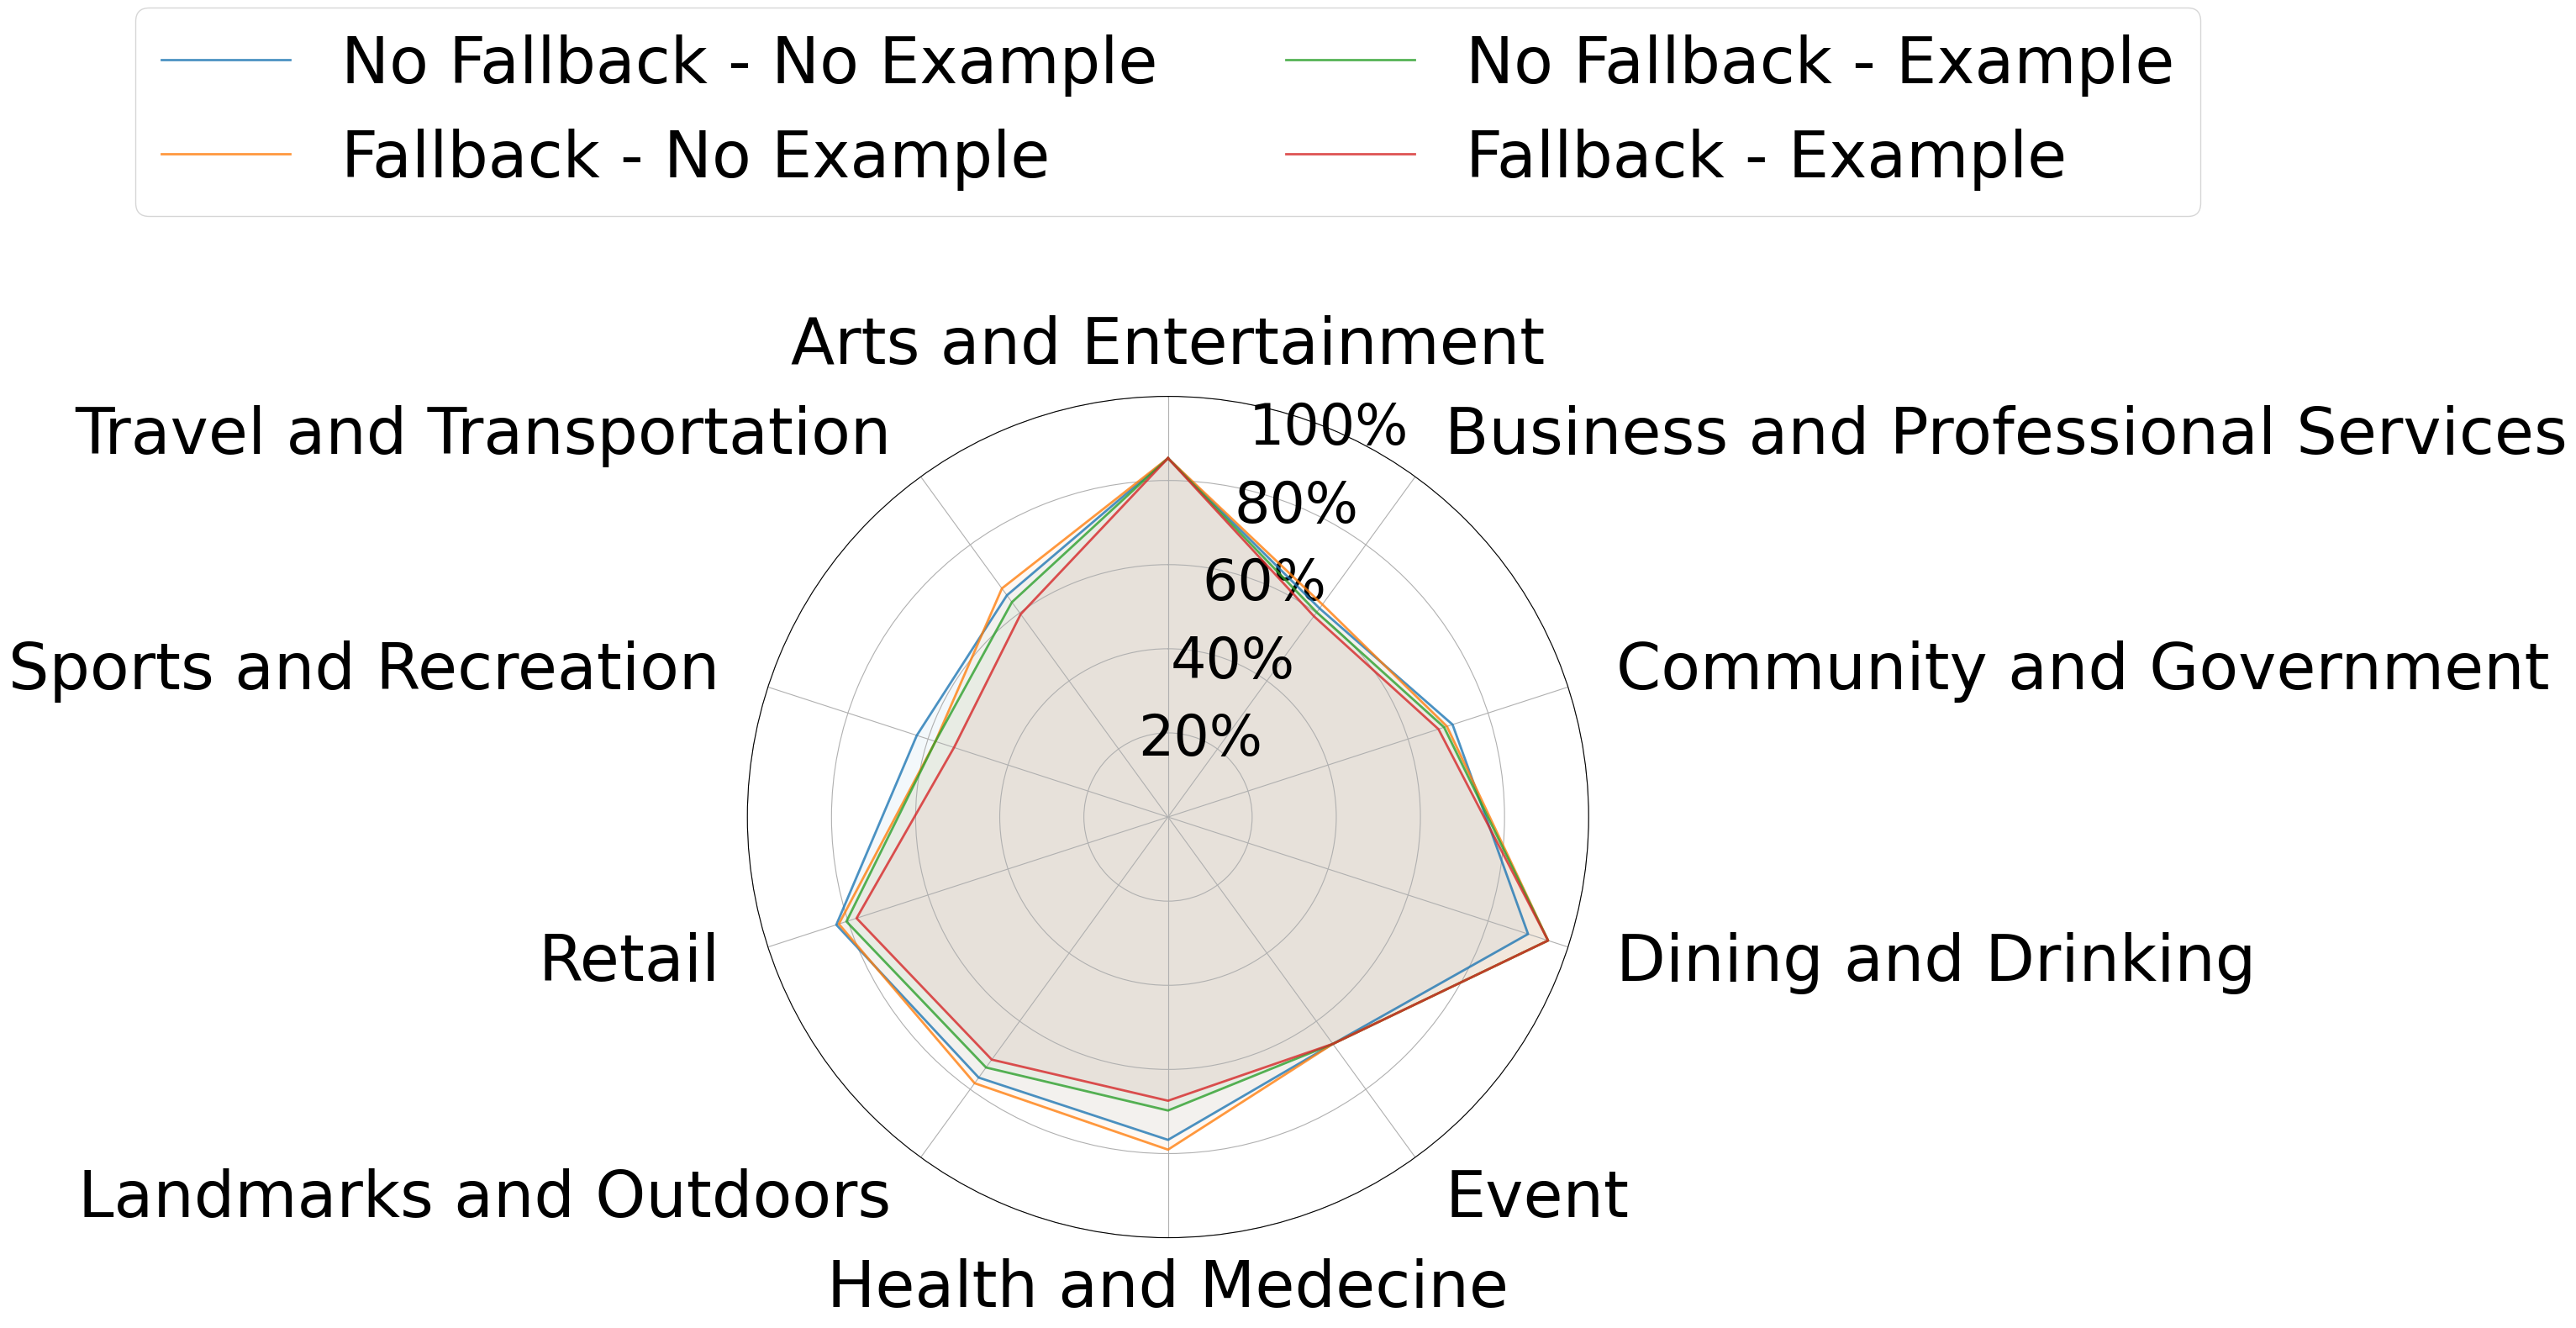

In [17]:
plot_radar_for_k(df_modele, groups_by_prompt, k_value=20, fontsize_labels=55)


In [18]:
def plot_radar_for_prompt_fs(df, groups_by_prompt, prompt_name, mapping=None, fontsize_labels=21):
    """
    Plot a radar chart for a single prompt, showing all k values on the same plot,
    with axes corresponding to FS categories.
    """
    if prompt_name not in groups_by_prompt:
        raise ValueError(f"{prompt_name} does not exist in groups_by_prompt")
    
    model_list = groups_by_prompt[prompt_name]  # column indices for this prompt
    k_values = [5, 10, 20, 30, 40, 50]

    # Columns of the DataFrame corresponding to this prompt
    mod_cols = [f"mod_{i}_new_correct" for i in model_list]
    results = df.groupby("FS_main")[mod_cols].mean()  # group by FS_main

    labels = results.index.tolist()
    if mapping:
        labels = [mapping.get(lab, lab) for lab in labels]  # replace names using mapping

    n_labels = len(labels)
    angles = np.linspace(0, 2*np.pi, n_labels, endpoint=False).tolist()
    angles += angles[:1]  # close the polygon

    # Figure and polar axes
    fig, ax = plt.subplots(figsize=(13,13), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Plot all k values for this prompt
    for idx, k_value in enumerate(k_values):
        col = f"mod_{model_list[idx]}_new_correct"
        values = results[col].tolist()
        values += values[:1]

        ax.plot(angles, values, linewidth=2, alpha=0.8, label=f"k = {k_value}")
        ax.fill(angles, values, alpha=0.05)

    # Hide automatic labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])

    # Place FS labels around the circle
    place_labels_outside_circle(ax, labels, angles[:-1], r_max=ax.get_ylim()[1], fontsize=fontsize_labels, margin=0.15)

    # Radial labels centered
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=28, ha="center", va="center")
    ax.set_ylim(0,1)

    # Legend and title
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.33), ncol=3, fontsize=fontsize_labels)
    #plt.tight_layout()
    plt.savefig(f"Radar_plot_FS_prompt_3.pdf", format="pdf", bbox_inches="tight")
    plt.show()

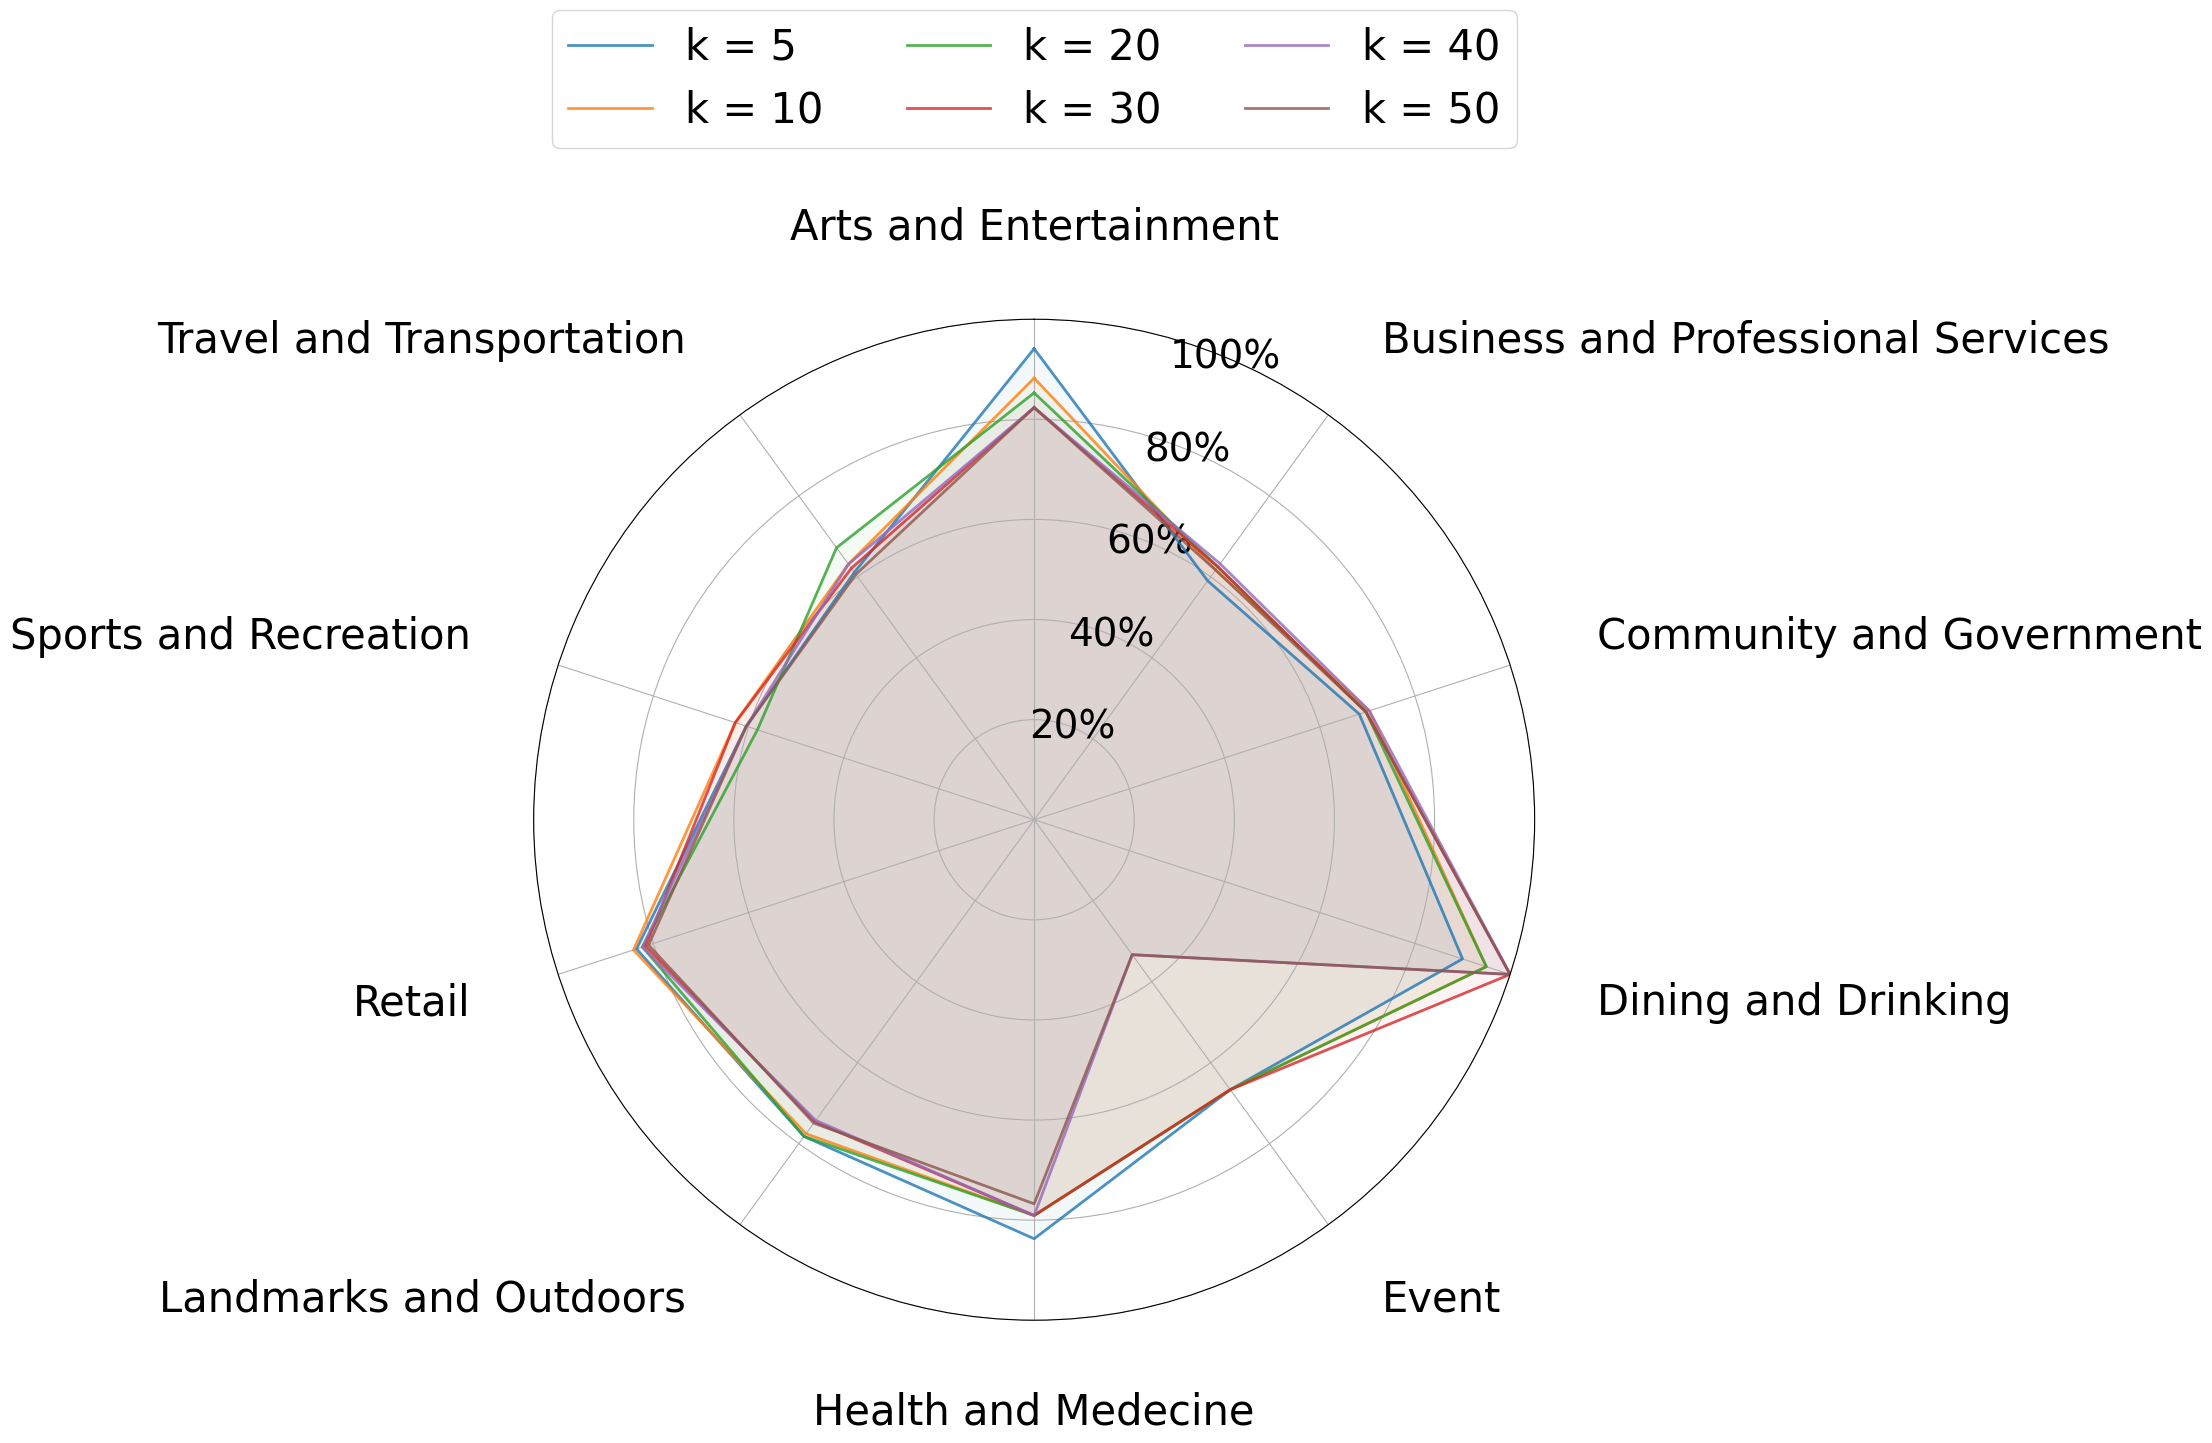

In [19]:
plot_radar_for_prompt_fs(df_modele, groups_by_prompt, "Fallback - No Example", mapping=mapping, fontsize_labels=30)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_for_k(df, groups_by_prompt, k_value, model_names=None, fontsize_labels=21):
    """
    Plot a radar chart for a given k with labels at the ends of the axes aligned
    along the ray. Labels near the vertical axis are positioned farther out
    to be fully outside the plot.
    """
    # Check k
    k_values = [5, 10, 20, 30, 40, 50]
    if k_value not in k_values:
        raise ValueError(f"k_value must be in {k_values}")
    idx = k_values.index(k_value)
    
    # Model columns
    mod_cols = [f"mod_{i}_new_correct" for lst in groups_by_prompt.values() for i in lst]
    # Average by category (index = OSM_main)
    results = df.groupby("OSM_main")[mod_cols].mean()
    
    # Labels / angles
    labels = results.index.tolist()
    n_labels = len(labels)
    angles = np.linspace(0, 2*np.pi, n_labels, endpoint=False).tolist()
    angles += angles[:1]  # close the polygon
    
    # Figure / polar axes
    fig, ax = plt.subplots(figsize=(14,14), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Plot each series (prompt) for the chosen k
    for prompt_name, model_list in groups_by_prompt.items():
        i = model_list[idx]
        col = f"mod_{i}_new_correct"
        label_name = model_names.get(f"mod_{i}", prompt_name) if model_names else prompt_name

        values = results[col].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, alpha=0.8, label=label_name)
        ax.fill(angles, values, alpha=0.05)
    
    # Hide automatic labels but keep ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])

    # Base radial position (slightly outside)
    r_min, r_max = ax.get_ylim()
    base_out = 1.03  # base position (1.03 * r_max)
    extra_vert = 0.26  # for labels near 90°/270°, push farther out
    extra_small = 0.03  # small offset for other labels if needed

    theta_offset = ax.get_theta_offset()
    theta_dir = ax.get_theta_direction()

    # Angular threshold (degrees) to detect "near vertical"
    vertical_threshold_deg = 12

    for lab, ang in zip(labels, angles[:-1]):
        # angle as displayed on the screen
        display_angle_rad = theta_offset + theta_dir * ang
        display_deg = np.degrees(display_angle_rad) % 360

        # rotation aligned to the ray (flip if on left half)
        rotation = display_deg
        if 90 < display_deg < 270:
            rotation = display_deg + 180

        # horizontal alignment (left/right/center)
        if abs(display_deg - 90) < vertical_threshold_deg or abs(display_deg - 270) < vertical_threshold_deg:
            ha = "center"
        elif 90 < display_deg < 270:
            ha = "right"
        else:
            ha = "left"

        # vertical alignment and radial distance:
        # - if near top (≈90°) => push radially + va='bottom'
        # - if near bottom (≈270°) => push radially + va='top'
        # - otherwise, keep centered vertically
        if abs(display_deg - 90) < vertical_threshold_deg:
            va = "center"
            r_text = r_max * (base_out + extra_vert)  # far enough outside
        elif abs(display_deg - 270) < vertical_threshold_deg:
            va = "center"
            r_text = r_max * (base_out + extra_vert)
        else:
            va = "center"
            r_text = r_max * (base_out + extra_small)

        # Finally, write text in polar coordinates (angle, r_text)
        ax.text(
            ang, r_text, lab,
            fontsize=fontsize_labels,
            rotation=rotation,
            rotation_mode="anchor",
            horizontalalignment=ha,
            verticalalignment=va
        )

    # Radial ticks and style
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=18, va="top")
    ax.set_ylim(0,1)
    
    # Legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.54), ncol=2, fontsize=20)
    plt.tight_layout()
    plt.savefig(f"Radar_plot_k={k_value}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

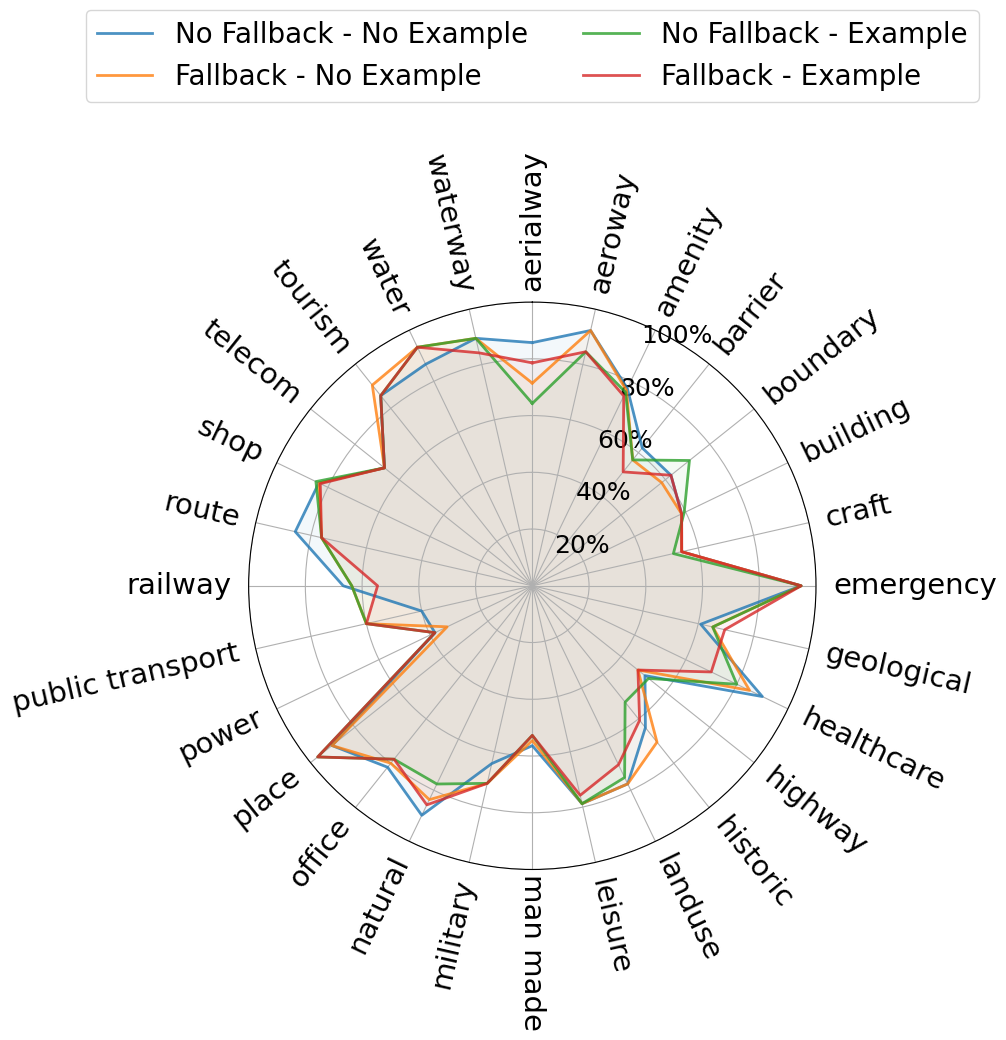

In [21]:
plot_radar_for_k(df_modele, groups_by_prompt, k_value=5)


In [22]:
def plot_radar_for_prompt(df, groups_by_prompt, prompt_name, model_names=None, fontsize_labels=21):
    """
    Plot a radar chart for a single prompt, showing all k values on the same figure.
    """
    # Check if the prompt exists
    if prompt_name not in groups_by_prompt:
        raise ValueError(f"{prompt_name} does not exist in groups_by_prompt")
    
    k_values = [5, 10, 20, 30, 40, 50]
    model_list = groups_by_prompt[prompt_name]
    
    # Columns of the models corresponding to this prompt
    mod_cols = [f"mod_{i}_new_correct" for i in model_list]
    results = df.groupby("OSM_main")[mod_cols].mean()
    
    # Labels and angles
    labels = results.index.tolist()
    n_labels = len(labels)
    angles = np.linspace(0, 2*np.pi, n_labels, endpoint=False).tolist()
    angles += angles[:1]  # close the polygon
    
    # Figure and polar axes
    fig, ax = plt.subplots(figsize=(14,14), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Plot curves for each k
    for idx, k_value in enumerate(k_values):
        i = idx  # the index in model_list corresponds to k_values
        col = f"mod_{model_list[i]}_new_correct"
        label = f"k = {k_value}"
        
        values = results[col].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, alpha=0.8, label=label)
        ax.fill(angles, values, alpha=0.05)
    
    # Hide automatic labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])

    # Labels around the circle
    r_min, r_max = ax.get_ylim()
    base_out = 1.03
    extra_vert = 0.26
    extra_small = 0.03
    vertical_threshold_deg = 12
    theta_offset = ax.get_theta_offset()
    theta_dir = ax.get_theta_direction()
    
    for lab, ang in zip(labels, angles[:-1]):
        display_angle_rad = theta_offset + theta_dir * ang
        display_deg = np.degrees(display_angle_rad) % 360

        # Rotate label along the radius (flip if on left side)
        rotation = display_deg
        if 90 < display_deg < 270:
            rotation += 180

        # Horizontal alignment based on position
        if abs(display_deg - 90) < vertical_threshold_deg or abs(display_deg - 270) < vertical_threshold_deg:
            ha = "center"
        elif 90 < display_deg < 270:
            ha = "right"
        else:
            ha = "left"

        # Vertical alignment and radial distance
        if abs(display_deg - 90) < vertical_threshold_deg or abs(display_deg - 270) < vertical_threshold_deg:
            va = "center"
            r_text = r_max * (base_out + extra_vert)
        else:
            va = "center"
            r_text = r_max * (base_out + extra_small)

        # Place text in polar coordinates
        ax.text(
            ang, r_text, lab,
            fontsize=fontsize_labels,
            rotation=rotation,
            rotation_mode="anchor",
            horizontalalignment=ha,
            verticalalignment=va
        )

    # Radial ticks
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=18, va="top")
    ax.set_ylim(0,1)
    
    # Legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.54), ncol=3, fontsize=18)
    plt.tight_layout()
    plt.savefig(f"Radar_plot_prompt_3.pdf", format="pdf", bbox_inches="tight")

    plt.show()

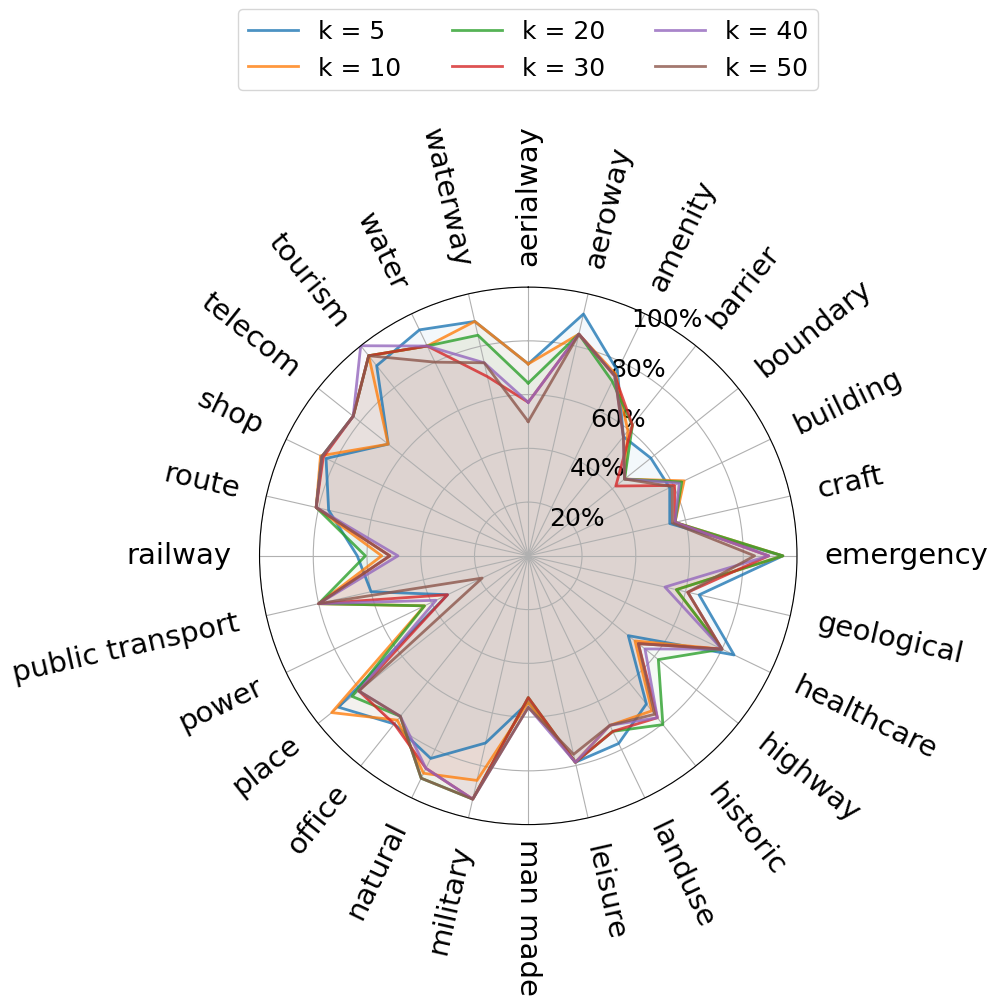

In [23]:
plot_radar_for_prompt(df_modele, groups_by_prompt, "Fallback - No Example")

# Summary table of results

In [ ]:
import pandas as pd
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if text is None or pd.isna(text):  # preserve None or NaN
        return None
    
    text = str(text).lower()                        # convert to lowercase
    text = unidecode.unidecode(text)                # remove accents
    text = re.sub(r'[^\w\s]', '', text)             # remove punctuation
    words = text.split()                            # split into words
    words = [word for word in words if word not in stop_words]  # filter stopwords
    return ' '.join(words)

# Apply text cleaning to FS dataset
df_fs['Tag'] = df_fs['Tag'].apply(clean_text)
df_fs['Depth_1'] = df_fs['Depth_1'].apply(clean_text)
df_fs['Depth_2'] = df_fs['Depth_2'].apply(clean_text)
df_fs['Depth_3'] = df_fs['Depth_3'].apply(clean_text)
df_fs['Depth_4'] = df_fs['Depth_4'].apply(clean_text)
df_fs['Depth_5'] = df_fs['Depth_5'].apply(clean_text)
df_fs['Depth_6'] = df_fs['Depth_6'].apply(clean_text)


def concat_depths_fs(row):
    levels = []
    for col in ['Depth_1', 'Depth_2', 'Depth_3', 'Depth_4', "Depth_5", "Depth_6"]:
        val = row[col]
        if pd.notna(val) and val is not None and str(val).strip() != '':
            levels.append(str(val).strip())
    return ' > '.join(levels)

# Create a full path for each FS entry
df_fs['Path'] = df_fs.apply(concat_depths_fs, axis=1)


# Build a dictionary mapping FS tag -> path
tag_to_path = dict(zip(df_fs["Tag"], df_fs["Path"]))

# For each model column mod_i_tag, create mod_i_path and depth columns
for i in range(1, 35):
    tag_col = f"mod_{i}_tag"
    path_col = f"mod_{i}_path"
    
    # Add the full path
    df_modele[path_col] = df_modele[tag_col].map(tag_to_path)
    
    # Extract individual depth levels
    for depth in range(1, 7):  # maximum depth = 6
        depth_col = f"mod_{i}_D{depth}"
        df_modele[depth_col] = df_modele[path_col].apply(
            lambda x: x.split(" > ")[depth-1] if isinstance(x, str) and len(x.split(" > ")) >= depth else None
        )


# Split the manual FS path into depth levels
df_modele[["FS_manual_D1", 
           "FS_manual_D2", 
           "FS_manual_D3", 
           "FS_manual_D4", 
           "FS_manual_D5", 
           "FS_manual_D6"]] = (
    df_modele["FS_manual_path"]
    .fillna("")                               # handle NaN values
    .apply(lambda x: x.split(" > "))          # split into list
    .apply(lambda parts: parts + [None]*(6-len(parts)))  # pad with None
    .apply(pd.Series)                         # convert to columns
)


In [ ]:
for i in range(9, 35):  # loop over models 9 to 34
    col_tag_pred = f"mod_{i}_tag"
    col_tag_true = "FS_manual_tag"
    
    for k in range(1, 7):  # 6 maximum depth levels
        col_pred = f"mod_{i}_D{k}"
        col_true = f"FS_manual_D{k}"
        col_correct = f"mod_{i}_correct_D{k}"
        col_new_correct = f"mod_{i}_new_correct"
        
        # Compute correctness at each depth: either new_correct flag is 1 or predicted depth matches manual depth
        df_modele[col_correct] = (
            (df_modele[col_new_correct] == 1) |  
            (df_modele[col_pred] == df_modele[col_true])  
        ).astype(int)

## Radar plot of the different depths for prompt 3

In [26]:
df_prompt3=df_modele[["OSM_tag", "OSM_main", "FS_main", "mod_18_tag", "mod_18_new_correct", "mod_18_correct_D1", "mod_18_correct_D2", "mod_18_correct_D3", "mod_18_correct_D4", "mod_18_correct_D5", "mod_18_correct_D6"]]
df_prompt3

,OSM_tag,OSM_main,FS_main,mod_18_tag,mod_18_new_correct,mod_18_correct_D1,mod_18_correct_D2,mod_18_correct_D3,mod_18_correct_D4,mod_18_correct_D5,mod_18_correct_D6
0,dairy,shop,retail,dairy store,1,1,1,1,1,1,1
1,chocolate,shop,retail,chocolate store,1,1,1,1,1,1,1
2,wine,shop,retail,wine store,1,1,1,1,1,1,1
3,cheese,shop,retail,cheese store,1,1,1,1,1,1,1
4,confectionery,shop,retail,candy store,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1200,aquaculture,landuse,business professional services,farm,0,0,0,0,0,0,0
1201,postal code,boundary,landmarks outdoors,government department,0,0,0,0,0,0,0
1202,disputed,boundary,landmarks outdoors,border crossing,0,0,0,0,0,0,0
1203,petroleum well,man made,business professional services,petroleum supplier,1,1,1,1,1,1,1


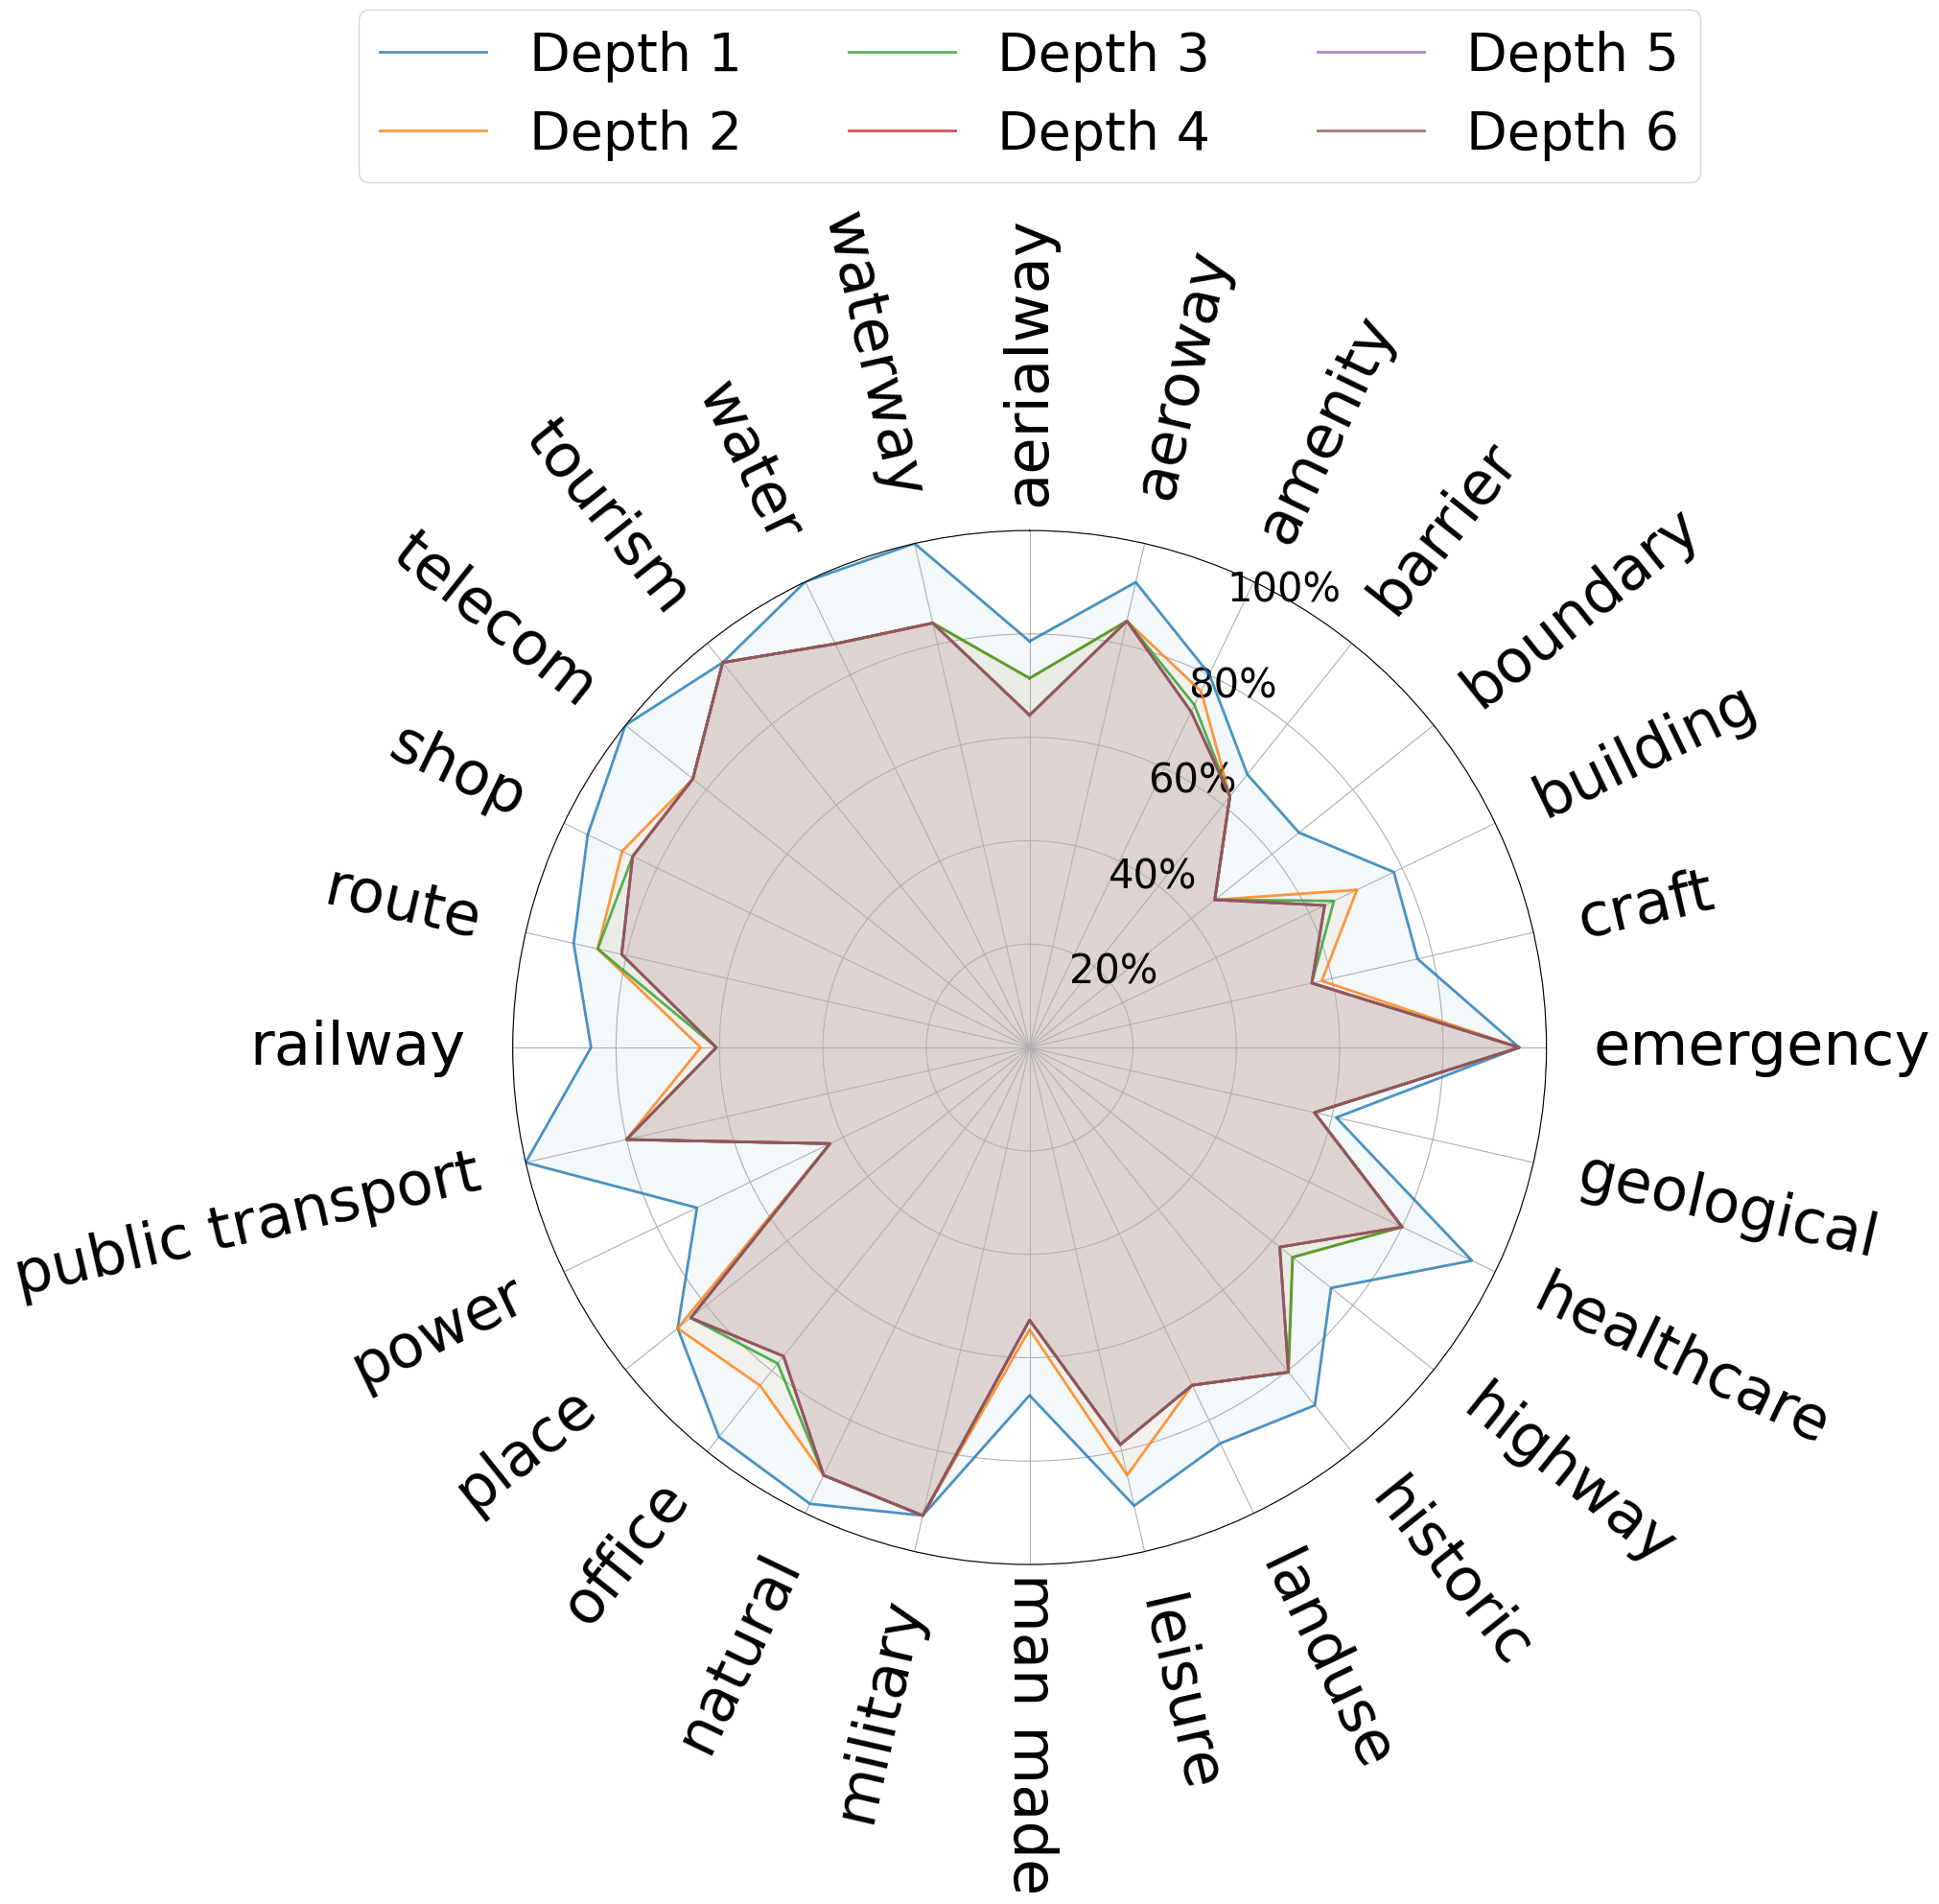

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Colonnes Dk
dk_cols = [f"mod_18_correct_D{k}" for k in range(1, 7)]

# Calcul du pourcentage de 1 par OSM_main et par Dk
df_grouped = df_prompt3.groupby("OSM_main")[dk_cols].mean()

# Préparation des angles
labels = list(df_grouped.index)
N = len(labels)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # fermer le polygone

# Figure / axe polar
fig, ax = plt.subplots(figsize=(14,14), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Tracer chaque courbe Depth k
for k, dk in enumerate(dk_cols, start=1):
    values = df_grouped[dk].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, alpha=0.8, label=f"Depth {k}")
    ax.fill(angles, values, alpha=0.05)

# Masquer les labels auto
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])

# Position radiale des labels
r_min, r_max = ax.get_ylim()
base_out = 1.03
extra_vert = 0.26
extra_small = 0.03

theta_offset = ax.get_theta_offset()
theta_dir = ax.get_theta_direction()
vertical_threshold_deg = 12

for lab, ang in zip(labels, angles[:-1]):
    display_angle_rad = theta_offset + theta_dir * ang
    display_deg = np.degrees(display_angle_rad) % 360

    # rotation alignée au rayon
    rotation = display_deg
    if 90 < display_deg < 270:
        rotation = display_deg + 180

    # alignement horizontal
    if abs(display_deg - 90) < vertical_threshold_deg or abs(display_deg - 270) < vertical_threshold_deg:
        ha = "center"
    elif 90 < display_deg < 270:
        ha = "right"
    else:
        ha = "left"

    # alignement vertical et distance radiale
    if abs(display_deg - 90) < vertical_threshold_deg:
        va = "center"
        r_text = r_max * (base_out + extra_vert)
    elif abs(display_deg - 270) < vertical_threshold_deg:
        va = "center"
        r_text = r_max * (base_out + extra_vert)
    else:
        va = "center"
        r_text = r_max * (base_out + extra_small)

    ax.text(
        ang, r_text, lab,
        fontsize=45,
        rotation=rotation,
        rotation_mode="anchor",
        horizontalalignment=ha,
        verticalalignment=va
    )

# Ticks radiaux et style
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=30, va="top")
ax.set_ylim(0, 1)

# Légende
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.53), ncol=3, fontsize=40)
plt.savefig(f"Radar_plot_prompt3_k20_depths.pdf", format="pdf", bbox_inches="tight")

#plt.tight_layout()
plt.show()


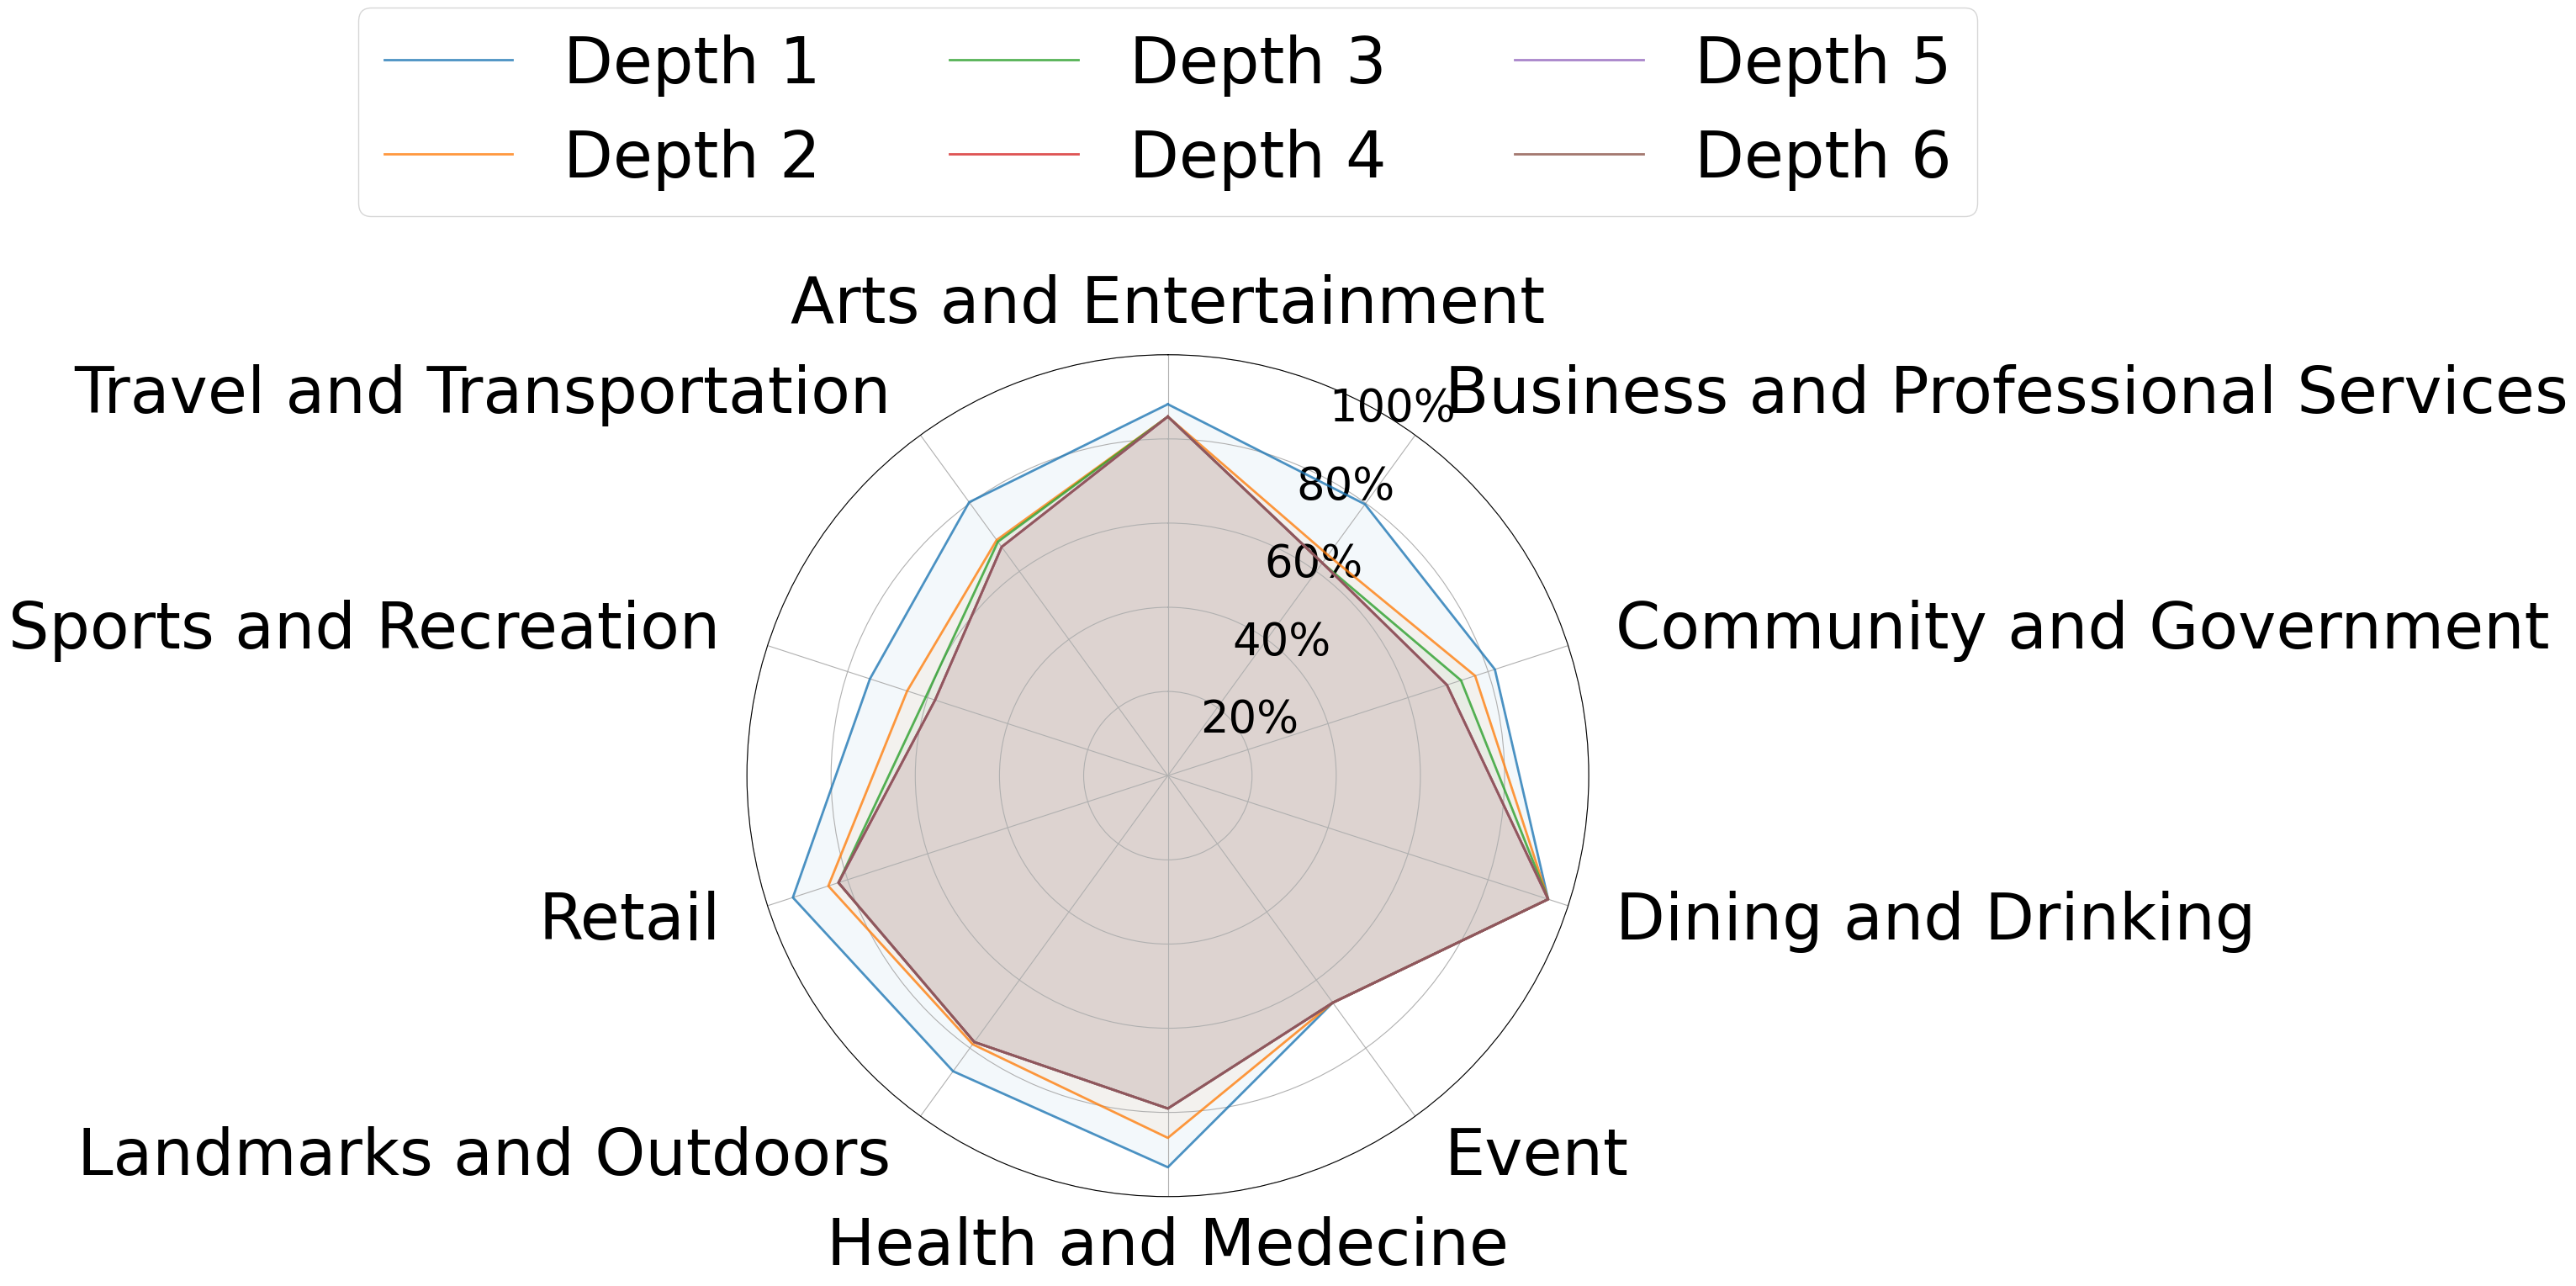

In [28]:
import matplotlib.pyplot as plt
import numpy as np

mapping = {
    "landmarks outdoors": "Landmarks and Outdoors",
    "community government": "Community and Government",
    "travel transportation": "Travel and Transportation",
    "business professional services": "Business and Professional Services",
    "arts entertainment": "Arts and Entertainment",
    "dining drinking": "Dining and Drinking",
    "retail": "Retail",
    "health medicine": "Health and Medecine",
    "sports recreation": "Sports and Recreation",
    "event": "Event"
}

import matplotlib.pyplot as plt
import numpy as np

def place_labels_outside_circle(ax, labels, angles, r_max, fontsize=23, margin=0):
    """
    Place les labels autour du radar avec :
    - ceux en haut et en bas centrés
    - ceux à gauche centrés à droite
    - ceux à droite centrés à gauche
    """
    r_label = r_max + margin
    
    for lab, ang in zip(labels, angles):
        ang_deg = np.degrees(ang) % 360  # convertir en degrés pour faciliter la logique
        
        if ang_deg == 0 or ang_deg == 180:   # haut ou bas
            ha = "center"
        elif 0 < ang_deg < 180:              # côté gauche du cercle
            ha = "left"
        else:                                # côté droit du cercle
            ha = "right"
        
        va = "center"  # toujours centré verticalement
        
        ax.text(
            ang, r_label, lab,
            fontsize=fontsize,
            rotation=0,
            rotation_mode="anchor",
            ha=ha,
            va=va
        )

def plot_radar_fs_horizontal(df, mapping=None, fontsize_labels=21):
    """
    Trace un radar plot groupé par FS_main,
    avec Depth 1...6 comme séries et labels horizontaux.
    """
    dk_cols = [f"mod_18_correct_D{k}" for k in range(1, 7)]
    results = df.groupby("FS_main")[dk_cols].mean()

    labels = results.index.tolist()
    if mapping:
        labels = [mapping.get(lab, lab) for lab in labels]

    n_labels = len(labels)
    angles = np.linspace(0, 2*np.pi, n_labels, endpoint=False).tolist()
    angles += angles[:1]  # fermer le polygone

    # Figure et axe polar
    fig, ax = plt.subplots(figsize=(13,13), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Tracer Depth k
    for k in range(1, 7):
        col = f"mod_18_correct_D{k}"
        values = results[col].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, alpha=0.8, label=f"Depth {k}")
        ax.fill(angles, values, alpha=0.05)

    # Masquer les xticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])

    # Placer les labels FS horizontaux autour du cercle
    place_labels_outside_circle(ax, labels, angles[:-1], r_max=ax.get_ylim()[1], fontsize=fontsize_labels, margin=0.15)

    # Ticks radiaux
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], va='top', fontsize=38)
    ax.set_ylim(0,1)

    # Légende en haut
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), ncol=3, fontsize=fontsize_labels)
    plt.savefig(f"Radar_plot_prompt3_k20_depths_FS.pdf", format="pdf", bbox_inches="tight")
    plt.show()


plot_radar_fs_horizontal(df_prompt3, mapping=mapping, fontsize_labels=55)


## Table of results

In [30]:
import pandas as pd
from sklearn.metrics import roc_auc_score

# List to store results
summary_list = []

for i in range(9, 35):  # models 9 to 34
    mod_key = f"mod_{i}"
    row = {"Model": model_names[mod_key]}  # use full model name
    
    # 👉 Add stats for new_correct
    col_new_correct = f"mod_{i}_new_correct"
    pct_new_correct = round(df_modele[col_new_correct].mean() * 100, 2)
    #row["% new_correct"] = pct_new_correct

    # Uncomment to compute AUC for new_correct if needed
    #try:
        #auc_new = round(roc_auc_score(df_modele[col_new_correct], df_modele[col_score]), 2)
    #except ValueError:
        #auc_new = None
    #row["AUC_new_correct"] = auc_new

    # For each depth k
    for k in range(1, 7):
        col_correct_Dk = f"mod_{i}_correct_D{k}"
        pct_correct_Dk = round(df_modele[col_correct_Dk].mean() * 100, 2)
        row[f"% correct_D{k}"] = pct_correct_Dk
        
        # Uncomment to compute AUC at depth k using the same score
        #try:
            #auc_Dk = round(roc_auc_score(df_modele[col_correct_Dk], df_modele[col_score]), 2)
        #except ValueError:
            #auc_Dk = None
        #row[f"AUC_D{k}"] = auc_Dk
    
    summary_list.append(row)

# Create the final DataFrame
df_summary = pd.DataFrame(summary_list)

# Display
df_summary


,Model,% correct_D1,% correct_D2,% correct_D3,% correct_D4,% correct_D5,% correct_D6
0,miniLM + prompt_2 (k=5),84.23,73.94,72.03,71.70,71.70,71.70
1,miniLM + prompt_3 (k=5),84.15,73.53,71.37,70.95,70.95,70.95
2,miniLM + prompt_5 (k=5),83.15,72.70,70.62,69.88,69.88,69.88
3,miniLM + prompt_6 (k=5),84.15,71.87,69.96,69.29,69.29,69.29
4,miniLM + prompt_2 (k=10),84.23,74.61,73.03,72.78,72.78,72.78
5,miniLM + prompt_3 (k=10),83.90,74.02,72.20,71.87,71.87,71.87
6,miniLM + prompt_5 (k=10),82.90,72.53,70.79,70.21,70.21,70.21
7,miniLM + prompt_6 (k=10),82.90,70.12,68.63,68.13,68.13,68.13
8,miniLM + prompt_2 (k=20),83.57,74.27,72.12,71.54,71.54,71.54
9,miniLM + prompt_3 (k=20),84.40,74.94,73.03,72.28,72.28,72.28
